<a href="https://colab.research.google.com/github/tabistoica/DL/blob/main/STOICA_TABITA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* **Nume:** STOICA
* **Prenume:** ESTERA-TABITA
* **Program de studii:** SIIS
* **An curent:** 2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


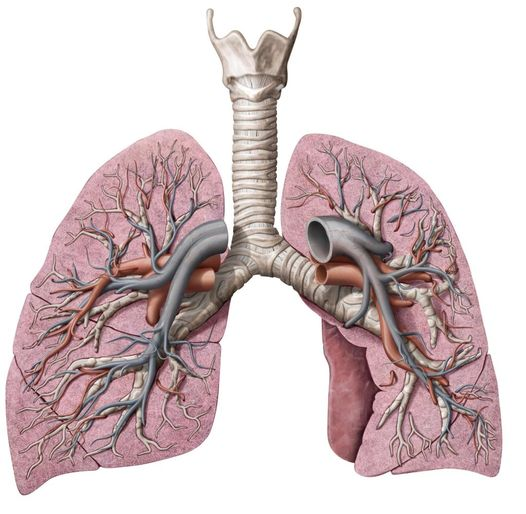

In [ ]:
import sys
import matplotlib.pyplot as plt
import cv2
import numpy as np

figsize = (10, 10)


from google.colab import drive
from google.colab.patches import cv2_imshow


# Montarea Google Drive
drive.mount('/content/drive')

# Calea către imaginea plămâni.jpg în Google Drive
image_path = '/content/drive/My Drive/IM/plămâni.jpeg'

# Citirea imaginii folosind calea din Google Drive
img = cv2.imread(image_path)

# Afișarea imaginii
if img is not None:
    cv2_imshow(img)
else:
    print('Imaginea nu a putut fi citită.')

* **Denumire filtru:** Resize
* **Explicatii si utilitate:**  Operația de redimensionare a imaginilor (resize) constă în ajustarea dimensiunilor unei imagini la o nouă rezoluție sau la noi dimensiuni. Procesul constă în modificarea numărului de pixeli și a mărimii acestora pentru a obține o imagine cu dimensiuni diferite. Atunci când redimensionezi o imagine, se utilizează diferite metode de interpolare pentru a completa sau a reduce numărul de pixeli, păstrând cât mai mult din informația inițială a imaginii.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

Dimensiunile originale ale imaginii: (514, 526, 3)
Dimensiunile imaginii redimensionate: (300, 300, 3)


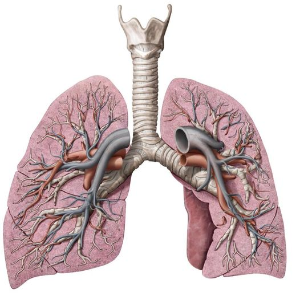

In [ ]:
print("Dimensiunile originale ale imaginii:", img.shape)

# Redimensionarea imaginii la o nouă dimensiune
new_width = 300
new_height = 300
resized_img = cv2.resize(img, (new_width, new_height))

# Afișarea dimensiunilor noii imagini redimensionate
print("Dimensiunile imaginii redimensionate:", resized_img.shape)

# Afișarea imaginii redimensionate
cv2_imshow(resized_img)

* **Denumire filtru:** cvtColor
* **Explicatii si utilitate:**  cv2.cvtColor() este o funcție din OpenCV ce transformă spațiul de culori al unei imagini. Folosind această funcție și specificând codul de conversie corespunzător (de exemplu, cv2.COLOR_BGR2GRAY pentru tonuri de gri sau cv2.COLOR_BGR2HSV pentru spațiul de culori HSV), poți schimba spațiul de culori al imaginii pentru a efectua diverse operații de prelucrare sau analiză a culorilor.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

In [ ]:
# Convertirea in nuante de gri ( grayscale )
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

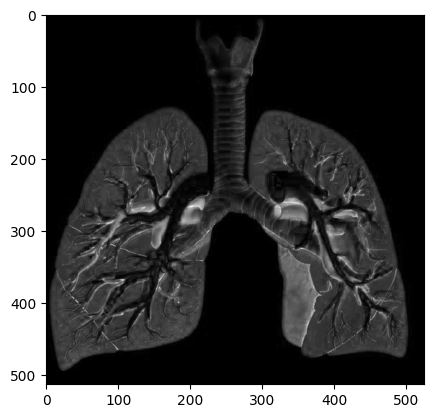

In [ ]:
# Convertirea in HSV
hsvim = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
bcrop = hsvim[0:700, 0:700, 1]      #[y:y+height, x:x+width, channel]
plt.imshow(bcrop, cmap="gray")

* **Denumire filtru:** Gaussian
* **Explicatii si utilitate:**  Filtrul Gaussian este un tip de filtru utilizat în prelucrarea imaginilor pentru a realiza atenuarea sau estomparea anumitor caracteristici ale imaginii, cum ar fi zgomotul sau detalii fine. Acest filtru se bazează pe distribuția gaussiană și este eficient pentru eliminarea detaliilor fine, creând astfel o imagine mai estetică sau pentru pregătirea imaginilor în cadrul unor algoritmi de analiză a imaginilor.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

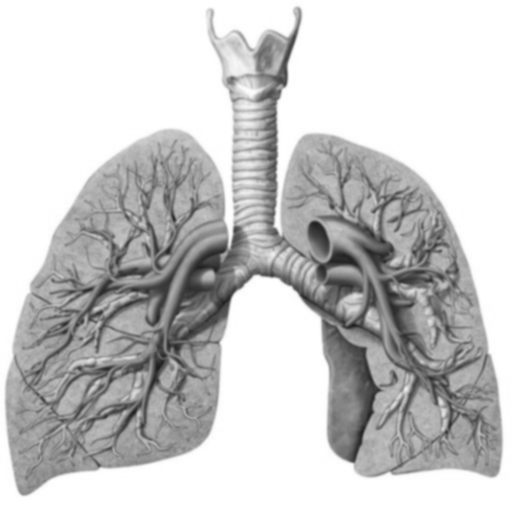

In [ ]:
#Gaussian
# Aplicarea filtrului Gaussian
blurred_img = cv2.GaussianBlur(img_gray, (5, 5), 0)

# Afișarea imaginii cu filtrul Gaussian aplicat
if blurred_img is not None:
    cv2_imshow(blurred_img)
else:
    print('Imaginea cu filtrul Gaussian nu a putut fi afișată.')

* **Denumire filtru:** Scharr
* **Explicatii si utilitate:**  Filtrul Scharr este un filtru de derivată utilizat în prelucrarea imaginilor pentru detecția de margini. Acesta este similar cu filtrul Sobel, dar este proiectat să ofere o mai bună sensibilitate la modificările de intensitate în diagonale. Fiind o variantă îmbunătățită a filtrului Sobel, filtrul Scharr este mai sensibil la detecția marginilor în imaginile care conțin elemente cu orientare diagonală.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

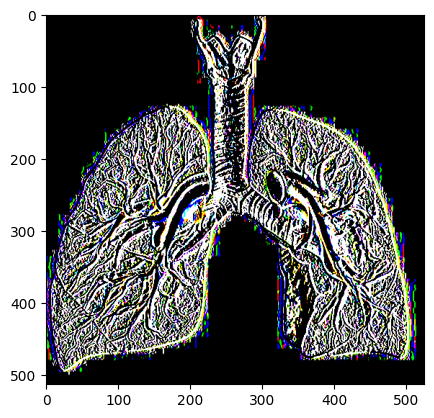

In [ ]:
#Scharr
fieldx = cv2.Scharr(img, cv2.CV_32F, 1, 0) / 15.36
plt.imshow(fieldx, cmap='gray')

* **Denumire filtru:** Sobel
* **Explicatii si utilitate:**  Filtrul Sobel este un operator de detectare a contururilor folosit în prelucrarea imaginilor și analiza computerizată a acestora. A fost dezvoltat pentru a evidenția zonele de schimbare bruscă a intensității pixelilor într-o imagine, care indică, de obicei, marginile obiectelor sau regiunile cu detalii semnificative. Acest filtru face parte dintr-o categorie mai largă de filtre numite filtre de gradient.
Filtrul Sobel utilizează o pereche de nuclee (kerneluri) convoluționale pentru a calcula derivatele parțiale ale imaginii în direcțiile orizontală și verticală. Aceste derivate parțiale sunt apoi combinate pentru a obține magnitudinea gradientului și orientarea acestuia în fiecare punct al imaginii.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

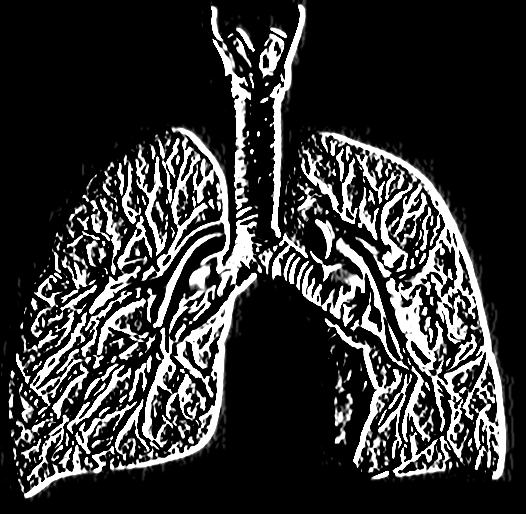

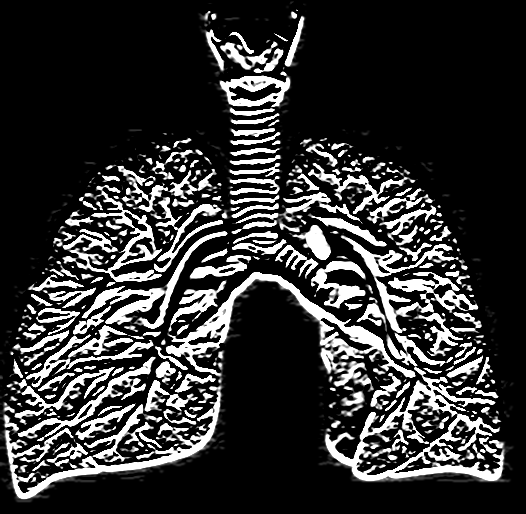

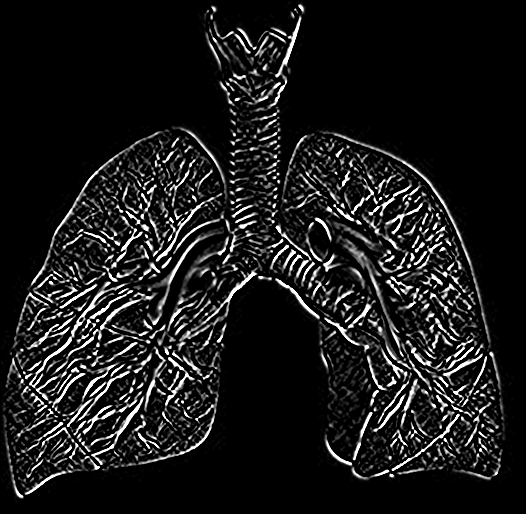

-1

In [ ]:
#Sobel
sobelx = cv2.Sobel(src=blurred_img, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
# Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=blurred_img, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
# Sobel Edge Detection on the Y axis
sobelxy = cv2.Sobel(src=blurred_img, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
# Combined X and Y Sobel Edge Detection
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
cv2.waitKey(0)
cv2_imshow(sobely)
cv2.waitKey(0)
cv2_imshow(sobelxy)
cv2.waitKey(0)

* **Denumire filtru:** Canny
* **Explicatii si utilitate:**  Filtrul Canny este eficient în evidențierea marginilor și eliminarea zgomotului, iar parametrii săi (cum ar fi pragurile) pot fi ajustați pentru a obține rezultate optime în funcție de specificul imaginii sau aplicației. Este larg utilizat în domenii precum recunoașterea obiectelor, analiza imaginilor medicale și prelucrarea imaginilor în general.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

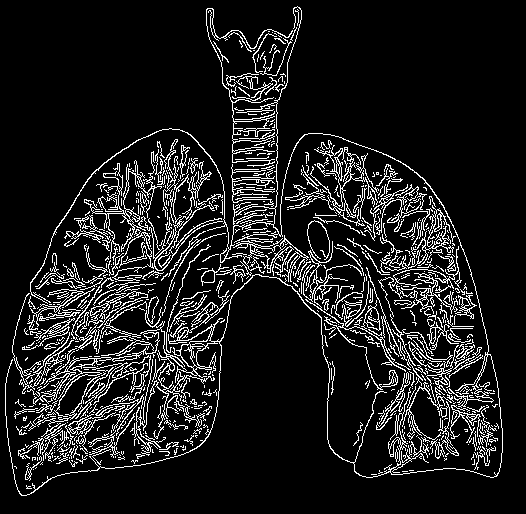

In [ ]:
#Canny
edges = cv2.Canny(img_gray, 100, 200)  # Ajustează valorile de prag pentru Canny după necesități

# Afișarea rezultatelor filtrului Canny
cv2_imshow(edges)

* **Denumire filtru:** Laplacian
* **Explicatii si utilitate:**  Filtrul Laplacian este un filtru de prelucrare a imaginilor utilizat pentru a evidenția regiunile în care intensitatea luminii variază brusc, indicând astfel marginile sau contururile obiectelor într-o imagine. Acesta este un filtru de tip detectare a muchiilor și face parte dintr-o categorie de filtre numite filtre de convoluție. Prin aplicarea filtrului Laplacian asupra unei imagini, obținem o imagine care evidențiază zonele în care există variații semnificative ale intensității, cum ar fi marginile sau contururile. Aceasta poate fi utilă într-o varietate de aplicații, inclusiv în analiza imaginilor medicale, prelucrarea de imagini pentru recunoașterea obiectelor sau în general în extragerea detaliilor importante dintr-o imagine.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

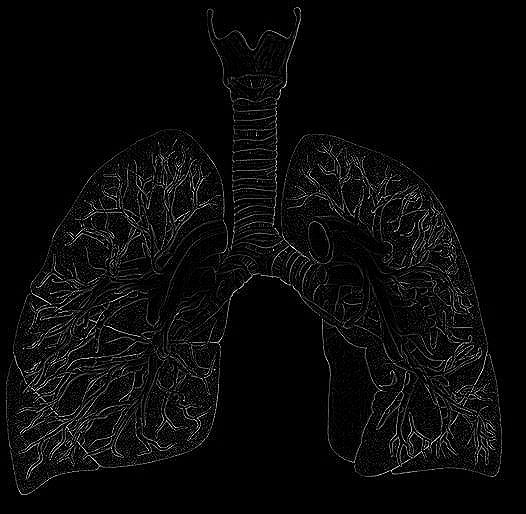

In [ ]:
#Laplacian
laplacian = cv2.Laplacian(img_gray, cv2.CV_64F)

# Afișarea rezultatelor filtrului Laplacian
cv2_imshow(laplacian)

* **Denumire filtru:** Filtru accentuare contururi
* **Explicatii si utilitate:**  Aici, matricea kernel, o configurație 3x3 de valori, este folosită pentru a evidenția contururile din imagine. Aceasta amplifică diferențele abrupte de intensitate, evidențiind astfel marginile sau contururile obiectelor. Rezultatul este o imagine în care aceste detalii sunt mai accentuate.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

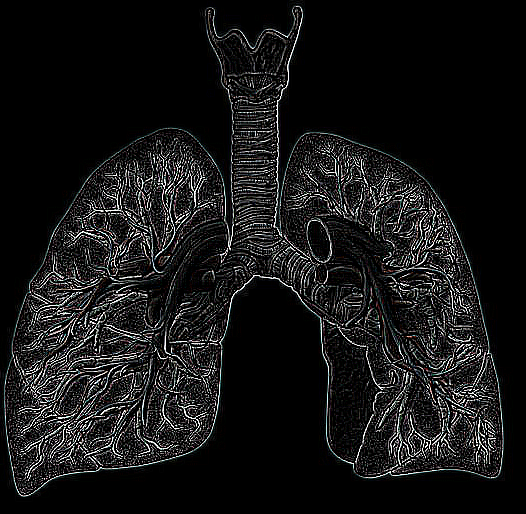

In [ ]:
def filtru_accentuare_contururi(img):
    # Definim matricea kernel pentru accentuarea contururilor
    kernel = np.array([[-1, -1, -1],
                       [-1,  8, -1],
                       [-1, -1, -1]])

    # Aplicăm filtrul pe imagine
    img_filtrata = cv2.filter2D(img, -1, kernel)

    return img_filtrata

# aplicăm filtrul pentru accentuarea contururilor
img_filtrata = filtru_accentuare_contururi(img)

cv2_imshow(img_filtrata)
cv2.waitKey(0)
cv2.destroyAllWindows()


* **Denumire filtru:** Estompare medie si detectare margini laplace
* **Explicatii si utilitate:**  Acest cod definește două noi funcții de filtrare: un filtru pentru estomparea medie și un alt filtru pentru detectarea marginilor folosind operatorul Laplace. Fiecare filtru este aplicat imaginii încărcate, iar rezultatele sunt afișate pentru vizualizare.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

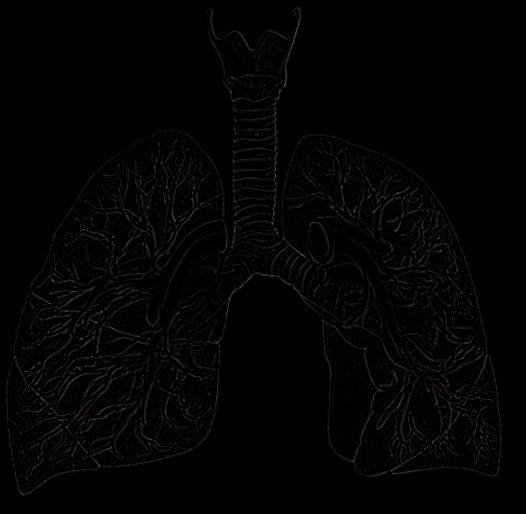

In [ ]:
def filtru_estompare_medie(img):
    # Definim matricea kernel pentru estomparea medie
    kernel_size = 3
    kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size * kernel_size)

    # Aplicăm filtrul de estompare medie pe imagine
    img_filtrata = cv2.filter2D(img, -1, kernel)

    return img_filtrata

def filtru_detectare_margini_laplace(img):
    # Definim matricea kernel pentru detectarea marginilor cu Laplace
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])

    # Aplicăm filtrul de detectare a marginilor cu operatorul Laplace pe imagine
    img_filtrata = cv2.filter2D(img, -1, kernel)

    return img_filtrata

# Aplicăm filtrul de estompare medie
img_estompare_medie = filtru_estompare_medie(img)

# Aplicăm filtrul de detectare a marginilor cu Laplace și afișăm rezultatul
img_detectare_margini_laplace = filtru_detectare_margini_laplace(img_estompare_medie)
cv2_imshow(img_detectare_margini_laplace)
cv2.waitKey(0)

cv2.destroyAllWindows()


* **Denumire filtru:** Filtrul bilateral pentru estompare în combinație cu laplacian
* **Explicatii si utilitate:**  Acest filtru utilizează filtrul bilateral pentru a estoma imaginea și apoi aplică filtrul Laplacian pentru a evidenția contururile și marginile. Filtrul bilateral este eficient în reducerea zgomotului, păstrând în același timp detalii importante în imagine. Combinarea acestuia cu filtrul Laplacian poate oferi o imagine clară și cu contururi bine definite.
* **Partea de image before:**
<img src='https://drive.google.com/uc?id=1DVTUCLhgUMTG-y4wVNDc29QUcXax7jSO'>

* **Partea de image after:**

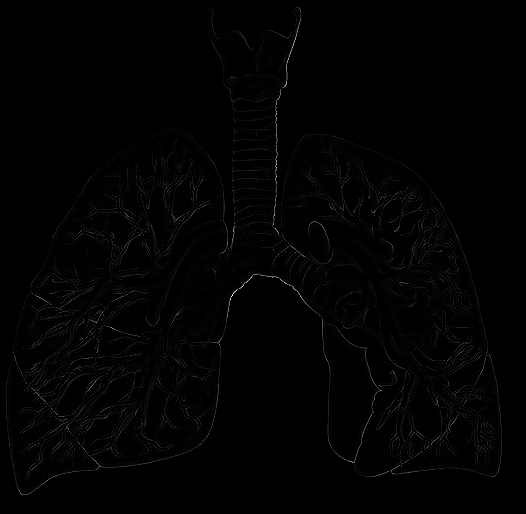

In [ ]:
# Aplicăm filtrul bilateral pentru estompare
img_estompat_bilateral = cv2.bilateralFilter(img_gray, 9, 75, 75)

# Aplicăm filtrul Laplacian pentru a evidenția contururile
img_contururi_laplacian = cv2.Laplacian(img_estompat_bilateral, cv2.CV_64F)

# Afișăm imaginea estompată și contururile evidențiate
cv2_imshow(img_contururi_laplacian)
cv2.waitKey(0)
cv2.destroyAllWindows()
